## Milk Dataset

In [4]:
import pandas as pd
milk = pd.read_csv('../Datasets/milk.csv', index_col=0)
# milk

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(milk)
df_scaled.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988


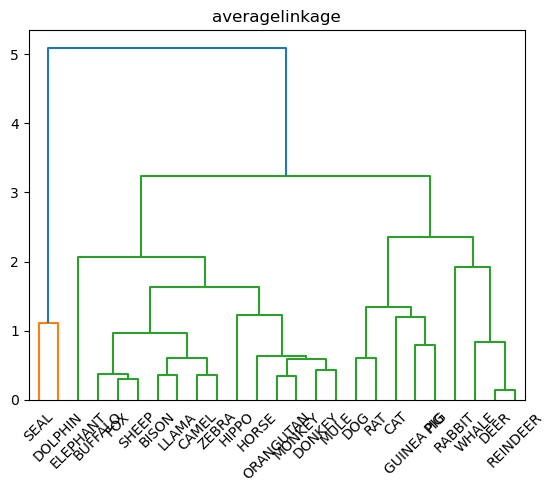

In [18]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
link = 'average'
mergings = linkage(df_scaled, method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+ 'linkage')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

clust = AgglomerativeClustering(n_clusters=3, linkage='average')
clust_labels = clust.fit_predict(df_scaled)

score = silhouette_score(df_scaled, clust_labels)
print("Silhouette Score:", score)


Silhouette Score: 0.48757649189546187


In [23]:
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    clust_labels = clust.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, clust_labels)
    
    silhouette_scores.append(score)

best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_score = np.max(silhouette_scores)

print("Best number of clusters:", best_n_clusters)
print("Best Silhouette Score:", best_score)

Best number of clusters: 2
Best Silhouette Score: 0.5186847578981009


In [51]:
clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust_labels = clust.fit_predict(df_scaled)
score = silhouette_score(df_scaled, clust_labels)

In [52]:
from sklearn.decomposition import PCA
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(df_scaled)

In [53]:
df_clust =  pca_data.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)
df_clust.sort_values('Clust')

,pca0,pca1,pca2,pca3,pca4,Clust
Animal,,,,,,
HORSE,-2.435175,-0.231478,0.330150,0.307664,-0.048184,0
ELEPHANT,-0.302294,-1.079878,1.004594,-0.114093,-0.000905,0
SHEEP,-0.513120,0.321365,0.078943,-0.020171,0.035616,0
ZEBRA,-1.390928,-0.012660,0.116929,-0.287079,0.004502,0
PIG,0.000100,0.788138,-0.334070,-0.056860,0.056423,0
LLAMA,-1.364034,0.309224,0.228597,-0.088242,0.024345,0
FOX,-0.429017,0.459312,0.135181,0.236941,0.024309,0
CAT,0.051008,0.470136,-0.355676,1.050970,-0.159793,0
MULE,-2.012658,-0.192807,-0.131325,-0.242899,0.025286,0


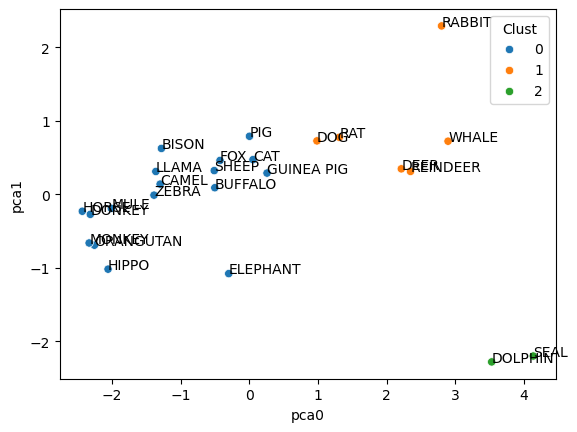

In [54]:
import seaborn as sns
sns.scatterplot(x=df_clust['pca0'], y=df_clust['pca1'], hue=df_clust['Clust'])
for i in range(0, df_clust.shape[0]):
    plt.text(df_clust['pca0'].values[i], df_clust['pca1'].values[i], list(milk.index)[i])

plt.show()

## Nutrient Dataset

In [56]:
import pandas as pd
df = pd.read_csv('../Datasets/nutrient.csv', index_col=0)
# df

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
# df_scaled.head()

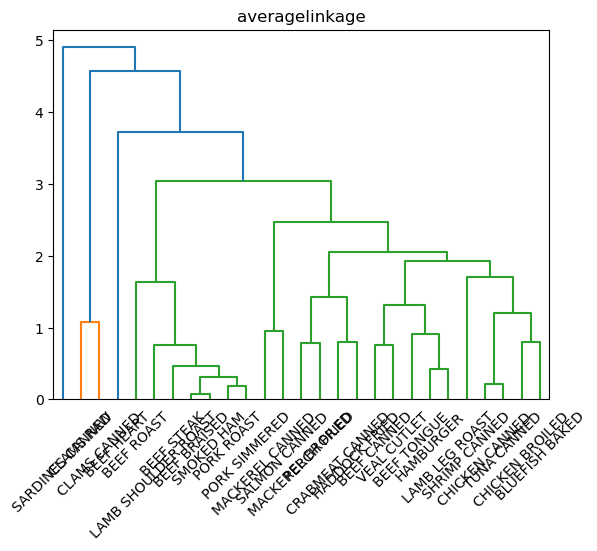

In [59]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
link = 'average'
mergings = linkage(df_scaled, method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+ 'linkage')
plt.show()

In [63]:
cluster_range = range(2, 11)
linkages = ['average', 'ward', 'complete', 'single']
silhouette_scores = []

for n_clusters in cluster_range:
    for l in linkages:
        clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=l)
        clust_labels = clust.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, clust_labels)
        silhouette_scores.append(score)

best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_score = np.max(silhouette_scores)

print("Best number of clusters:", best_n_clusters)
print("Best Silhouette Score:", best_score)
print("Best Linkage Score:", linkages[np.argmax(best_score)])

Best number of clusters: 5
Best Silhouette Score: 0.44834235285877894
Best Linkage Score: average


In [64]:
clust = AgglomerativeClustering(n_clusters=5, linkage='average')
clust_labels = clust.fit_predict(df_scaled)

from sklearn.decomposition import PCA
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(df_scaled)

In [65]:
df_clust = pca_data.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)
df_clust.sort_values('Clust')

,pca0,pca1,pca2,pca3,pca4,Clust
Food_Item,,,,,,
BEEF TONGUE,0.139724,0.231166,0.241602,-0.409972,-0.025657,0
SALMON CANNED,-1.535433,-0.713151,-1.533960,-0.065717,-0.046296,0
PERCH FRIED,-0.106700,-0.079860,-0.417400,-1.046451,0.133917,0
MACKEREL CANNED,-1.189782,0.084699,-1.345458,0.265016,-0.016102,0
MACKEREL BROILED,0.216685,-0.679264,-0.168090,-0.810376,-0.033912,0
HADDOCK FRIED,-0.788883,-0.625519,-0.518010,-1.488127,0.078415,0
CRABMEAT CANNED,-1.462484,-0.244363,-0.695135,-1.566693,-0.000690,0
BLUEFISH BAKED,-0.684565,-1.587139,0.119651,-0.622858,-0.007018,0
VEAL CUTLET,-0.126633,-0.606239,0.983172,0.204163,0.023817,0


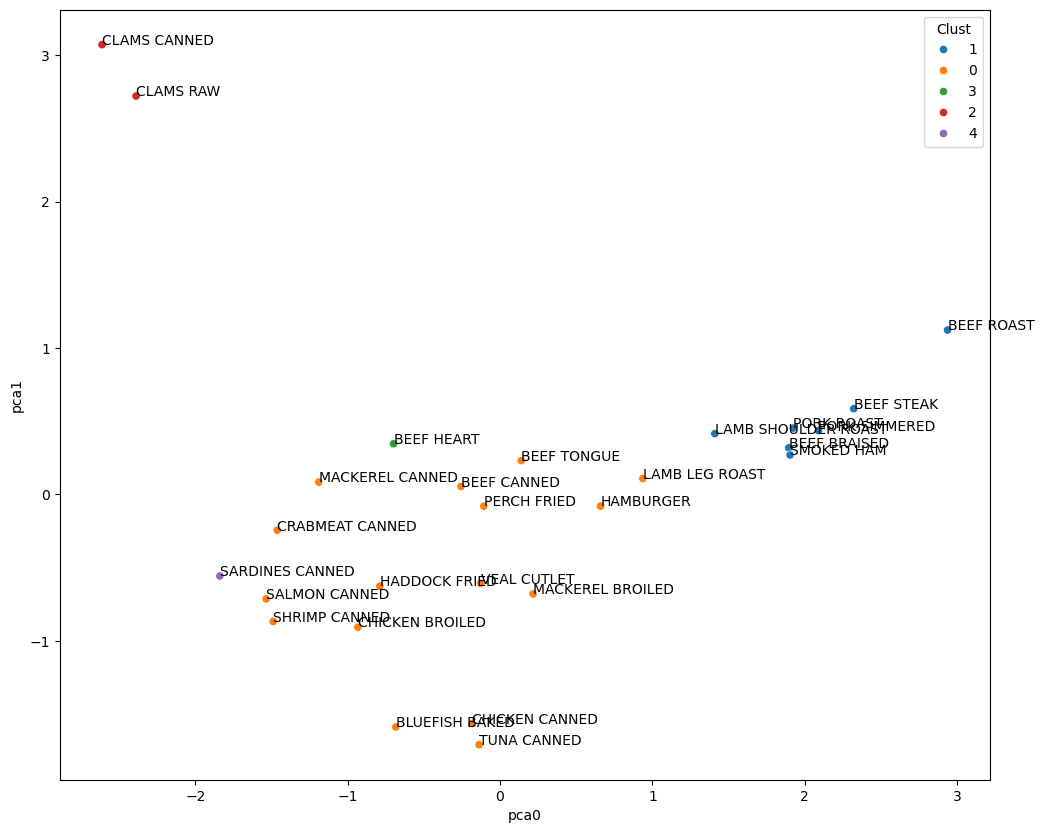

In [70]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.scatterplot(x=df_clust['pca0'], y=df_clust['pca1'], hue=df_clust['Clust'])
for i in range(0, df_clust.shape[0]):
    plt.text(df_clust['pca0'].values[i], df_clust['pca1'].values[i], list(df.index)[i])

plt.show()